# Prática independente - Visualização.

<br>
<img src="house_price.png" width="950" />
<br>


#### Vamos investigar um dataset com preços de casas em [King County](https://en.wikipedia.org/wiki/King_County,_Washington) EUA.

#### Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

#### Importamos os pacotes necessários:

In [34]:
# Pacotes numéricos e estatísticos
import numpy as np
import scipy.stats as stats

# Pandas gerencia o carregamento e a manipulação do dataset
import pandas as pd

# Funções de plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar matplotlib para que seja mostrado no notebook (sem necessidade de usar plt.show())
%matplotlib inline

#### Exercício 1: Carregamos os dados com o pandas.

In [35]:
houses = pd.read_csv('kc_house_data.csv')

#### verifique a forma com o atributo `.shape` e estude as primeiras linhas do dataset com o atributo `head()`.

In [36]:
houses.shape

(21613, 21)

In [37]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Imprima a lista de nomes das colunas.

In [38]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Use o comando .info() para caracterizar os dados do dataframe.

In [39]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Exercício - 2: Descreva brevemente o dataset.

#### Que informação ele contém? 

#### Quantos casos? 

#### Que tipo de dados possui?



In [40]:
houses.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Construa arranjos numpy para `price` e `yr_built`.

In [41]:
housePrice = houses['price'].values
houseYearBuilt = houses['yr_built'].values

#### Impríma-os na tela.

In [42]:
housePrice, houseYearBuilt

(array([221900., 538000., 180000., ..., 402101., 400000., 325000.]),
 array([1955, 1951, 1933, ..., 2009, 2004, 2008]))

#### Estude a função `plt.plot()` e plote os arranjos numpy para `yr_built` vs `price`.

In [43]:
#plt.plot?

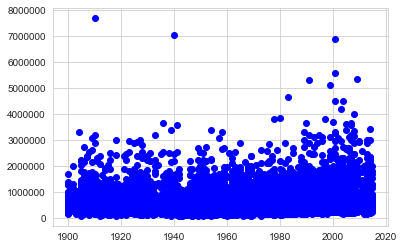

In [44]:
plt.plot(houseYearBuilt, housePrice, 'bo')

* Você considera o tamanho da imagem adequado? E o tipo ou a cor do marcador?
* Lembre-se que colocar *;* no final da sentença fará com que apenas a imagem seja mostrada

#### Estude a função `plt.figure()` e plote novamente os arranjos numpy para `yr_built` vs `price`.

In [45]:
#plt.figure?

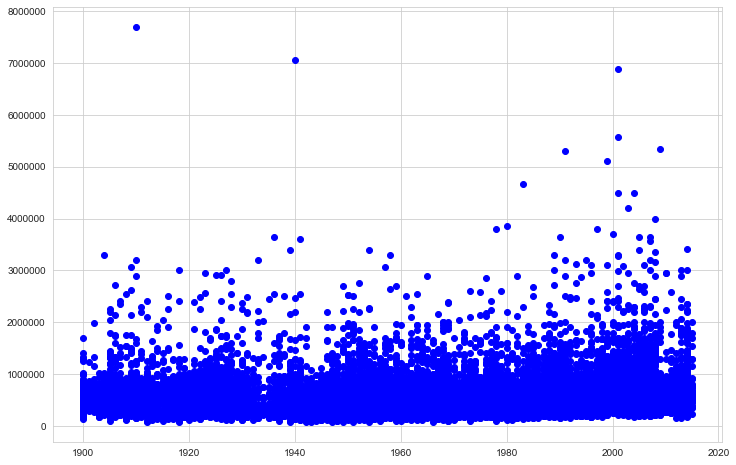

In [46]:
plt.figure(figsize = (12,8))
plt.plot(houseYearBuilt, housePrice, 'bo')

#### Explore opções `plt.xlabel()` e `plt.ylabel()` de legendas e `plt.title()` de título. e replote a mesma figura.

In [47]:
#plt.xlabel?
#plt.ylabel?
#plt.title?

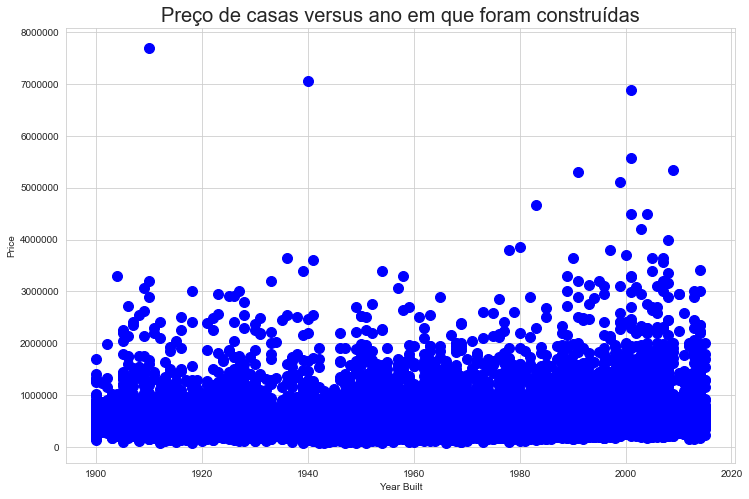

In [48]:
# Replique o gráfico anterior, incluindo nomes dos eixos e título do gráfico
plt.figure(figsize = (12, 8))

# Aumentamos o tamanho dos pontos
plt.plot(houseYearBuilt, housePrice, 'bo', markersize = 10)

# Nome eixo x
plt.xlabel("Year Built")

# Nome eixo y
plt.ylabel("Price")

# Título do gráfico
plt.title("Preço de casas versus ano em que foram construídas", fontsize = 20);

#### Observe as alternativas com o comando `sns.jointplot()`.

In [49]:
#sns.jointplot?

#### Construa arranjos numpy para `sqft_living` e `bedrooms`.

In [50]:
houseSquaredFeetLiving = houses['sqft_living'].values
houseBedrooms = houses['bedrooms'].values

In [51]:
#sns.set_style?
#sns.jointplot?

#### Estude a relação `sqft_living` vs `Price` e faça a plotagem das duas variáveis com seus respectivos histogramas.

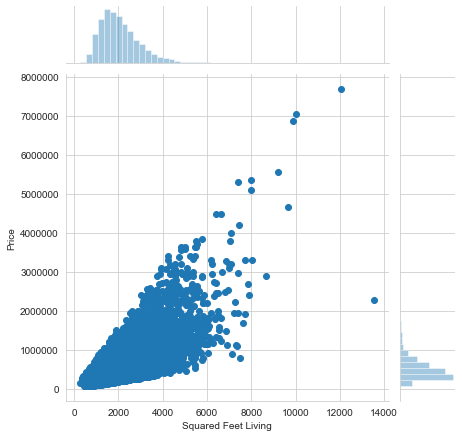

In [52]:
sns.set_style('whitegrid')
ax = sns.jointplot(houseSquaredFeetLiving, housePrice)
ax.set_axis_labels(xlabel = 'Squared Feet Living', ylabel = 'Price')

#### Vejamos do que se trata o `sns.pairplot()` do seaborn.

In [53]:
#sns.pairplot?


#### Crie um subconjunto do dataframe "houses", selecionando apenas as colunas `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot` , `floors`.


In [54]:
housesInside = houses.loc[:, ['price','bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors']]
housesInside

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0
21609,400000.0,4,2.50,2310,5813,2.0
21610,402101.0,2,0.75,1020,1350,2.0
21611,400000.0,3,2.50,1600,2388,2.0


#### Aplique a função `pairplot()` para criar um gráfico com as colunas do subconjunto criado acima.

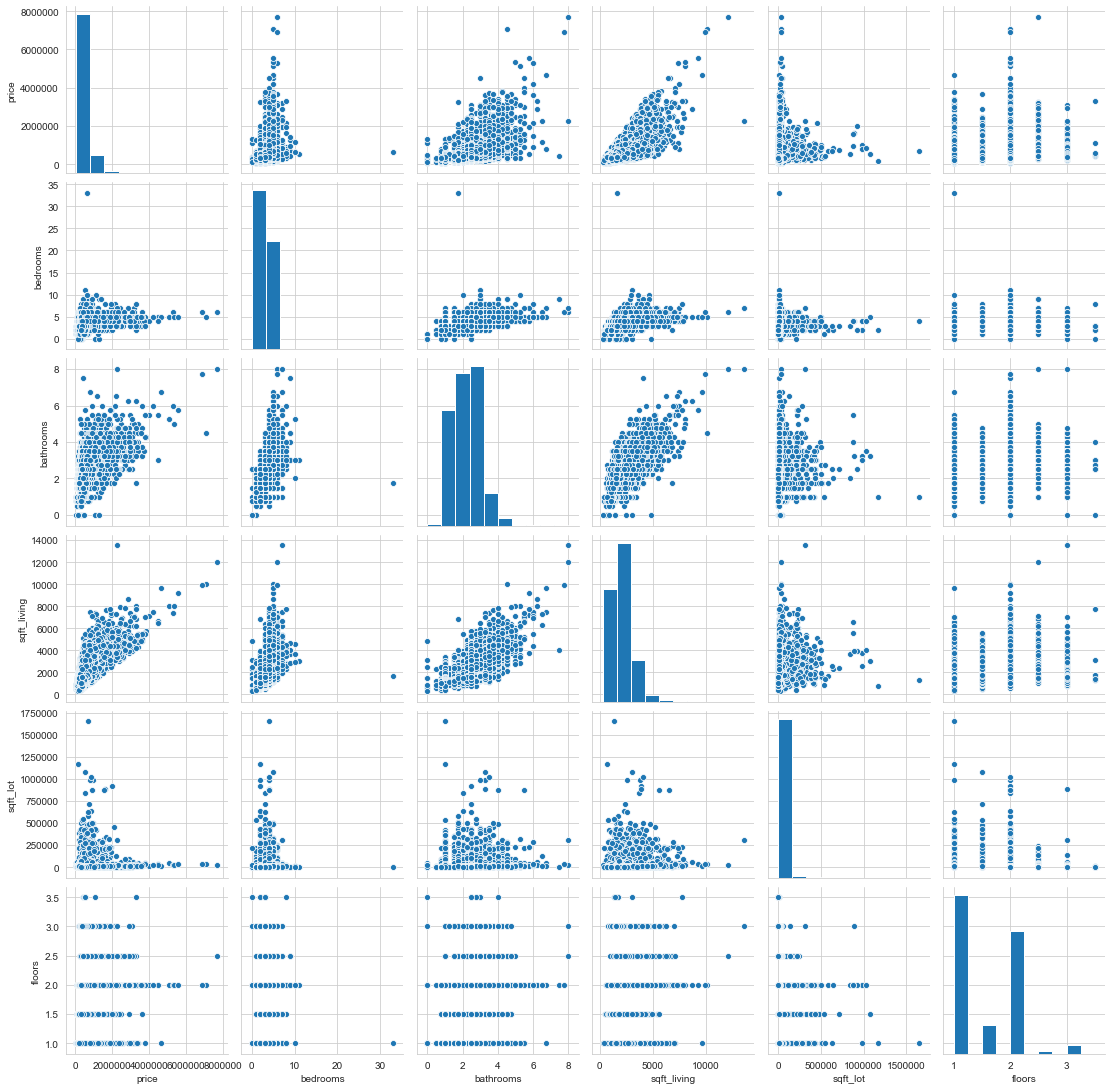

In [55]:
sns.pairplot(housesInside)

#### Exercício 3: Considerando o o subconjunto criado acima.

In [56]:
housesInside.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


#### Estude a função `sns.boxplot`.

In [57]:
#sns.boxplot?

#### Box plots: Analise a distribuição da variável `price`, de acordo com o número de quartos `bedrooms` e componha o boxplot da relação.

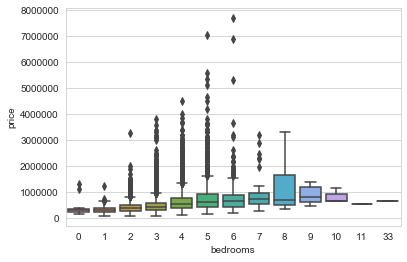

In [58]:
sns.boxplot(x = 'bedrooms', y = 'price', data = housesInside);

#### De modo análogo, analise a distribuição da variável `floors`, segundo o o preço `price`.

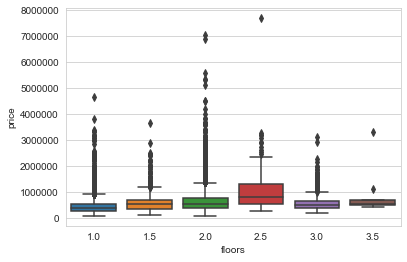

In [59]:
sns.boxplot(x = 'floors', y = 'price', data = housesInside);

#### O que você pode dizer sobre os dois `boxplots`?

#### Estude também a função `sns.barplot`.

In [60]:
#sns.barplot?

#### Gráfico de barras: Plote um gráfico de barras para a relação entre o número de pavimentos `floors` e a área de moradia `sqft_living`.

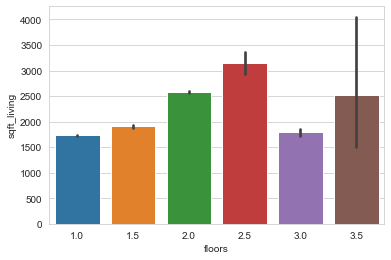

In [61]:
sns.barplot(x = "floors", y = "sqft_living", data = housesInside);